<a href="https://colab.research.google.com/github/karanm21/IITG_Research_Intern/blob/main/IITG_features_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path= "/content/drive/MyDrive/IITG /features_dataset/S_features.csv"
dfS= pd.read_csv(path)

In [ ]:
path1= "/content/drive/MyDrive/IITG /features_dataset/V_features.csv"
dfV= pd.read_csv(path1)

In [ ]:
dfS.TRAIN.value_counts()

N    6125
S    5903
Name: TRAIN, dtype: int64

In [ ]:
dfV.TRAIN.value_counts()

V    6747
N    5285
Name: TRAIN, dtype: int64

In [ ]:
dfS= dfS.drop(['Unnamed: 0'], axis=1)
dfV= dfV.drop(['Unnamed: 0'], axis=1)

In [ ]:
frames= [dfV, dfS]
df= pd.concat(frames, ignore_index=False)

In [ ]:
df.shape

(24060, 25)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(24060, 25)

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,RRmean,PQmean,QPmean,RTmean,PSmean,QRSmean,ICEBmean,QTCmean,RRvar,PQvar,...,QTCvar,RRstd,PQstd,QPstd,RTstd,PSstd,QRSstd,ICEBstd,QTCstd,TRAIN
0,0.715,0.110,0.602,0.334,0.284,0.171,2.531378,0.604370,0.000587,0.000020,...,0.000029,0.024228,0.004472,0.021260,0.010000,0.002828,0.007141,0.136793,0.005356,V
1,0.732,0.111,0.616,0.345,0.283,0.175,2.534713,0.603703,0.000152,0.000051,...,0.000294,0.012329,0.007141,0.012961,0.014799,0.006557,0.007681,0.208555,0.017135,V
2,2.164,0.144,2.040,0.208,0.276,0.080,2.900000,0.107209,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,N
3,2.304,0.072,2.164,0.440,0.424,0.320,1.637500,0.227431,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,S
4,0.891,0.243,0.639,0.373,0.342,0.099,4.353877,0.493961,0.010035,0.005987,...,0.016484,0.100175,0.077376,0.093782,0.072409,0.070000,0.016823,0.304594,0.128390,S


In [ ]:
import keras
from keras import optimizers, losses, activations, models, layers
from keras.layers import Conv1D , MaxPooling1D , Dense , Dropout ,GlobalMaxPooling1D , Input, Activation
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

In [ ]:
# Here we calculate the 10 fold cross validation results by considering the entire set of 24 features.


In [ ]:
import numpy as np

In [ ]:
seed = 8
np.random.seed(seed)

size = 24
X_data = df.iloc[0:,0:size]
y_data = df.iloc[0:,24:25]

In [ ]:
X_data.head()

,RRmean,PQmean,QPmean,RTmean,PSmean,QRSmean,ICEBmean,QTCmean,RRvar,PQvar,...,ICEBvar,QTCvar,RRstd,PQstd,QPstd,RTstd,PSstd,QRSstd,ICEBstd,QTCstd
0,0.715,0.110,0.602,0.334,0.284,0.171,2.531378,0.604370,0.000587,0.000020,...,0.018712,0.000029,0.024228,0.004472,0.021260,0.010000,0.002828,0.007141,0.136793,0.005356
1,0.732,0.111,0.616,0.345,0.283,0.175,2.534713,0.603703,0.000152,0.000051,...,0.043495,0.000294,0.012329,0.007141,0.012961,0.014799,0.006557,0.007681,0.208555,0.017135
2,2.164,0.144,2.040,0.208,0.276,0.080,2.900000,0.107209,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.304,0.072,2.164,0.440,0.424,0.320,1.637500,0.227431,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.891,0.243,0.639,0.373,0.342,0.099,4.353877,0.493961,0.010035,0.005987,...,0.092778,0.016484,0.100175,0.077376,0.093782,0.072409,0.070000,0.016823,0.304594,0.128390


In [ ]:
y_data.head()

,TRAIN
0,V
1,V
2,N
3,S
4,S


In [ ]:
y_encoded= pd.get_dummies(y_data)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
y_data= LabelEncoder().fit_transform(y_data)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# y_encoded= to_categorical(y_data, num_classes=3)

In [ ]:
# y_encoded.head()

,TRAIN_N,TRAIN_S,TRAIN_V
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,0,1


In [ ]:
# y_encoded.shape


(24060, 3)

In [ ]:
X_data = StandardScaler().fit(X_data).transform(X_data)
# y_data = y_data.to_numpy()

In [ ]:
# y_encoded.head()

,TRAIN_N,TRAIN_S,TRAIN_V
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,0,1


In [ ]:
# y_encoded.to_numpy()

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
sensscores = []
specscores = []
ppvscores = []
aucscores = []

In [ ]:
X_data = X_data.reshape(X_data.shape[0], size, 1)

In [ ]:
y_data

array([2, 2, 0, ..., 0, 2, 0])

In [ ]:
X_data.shape

(24060, 24, 1)

In [ ]:
for train_idx, test_idx in kfold.split(X_data, y_data):

    X_train, X_test = X_data[train_idx], X_data[test_idx]
    y_train, y_test = y_data[train_idx], y_data[test_idx]

    y_train= pd.get_dummies(y_train)
    y_test= pd.get_dummies(y_test).to_numpy()
    ann = models.Sequential([


        layers.Dense(32, kernel_initializer="lecun_normal", activation = 'relu',  input_shape=(size,1)),
        layers.Flatten(),
#         layers.Dense(32, kernel_initializer="lecun_normal", activation = 'relu'),
        layers.Dense(20, kernel_initializer="lecun_normal", activation = 'relu'),
        layers.Dense(14, kernel_initializer="lecun_normal", activation = 'relu'),
        layers.Dense(8, kernel_initializer="lecun_normal", activation = 'relu'),
        layers.Dense(3, kernel_initializer="lecun_normal", activation = 'softmax')
    ])

    ann.compile(optimizer = 'adam', loss='categorical_crossentropy',
                metrics=['Recall','AUC','TruePositives','FalsePositives','TrueNegatives','FalseNegatives'])
    ann.fit(X_train ,y_train, epochs = 40, verbose = 1)

    preds = (ann.predict(X_test) > 0.5).astype("int32").ravel()
    tn, fp, fn, tp = confusion_matrix(y_test.ravel(), preds).ravel()

    scores = ann.evaluate(X_test, y_test, verbose=0)
    sensitivity = tp/(tp + fn)
    specificity = tn/(tn + fp)
    ppv = tp/(tp + fp)

    sensscores.append(sensitivity*100)
    specscores.append(specificity*100)
    ppvscores.append(ppv*100)
    aucscores.append(scores[2])

print("Mean Sensitivity is %.2f%% (+/- %.2f%%)" % (np.mean(sensscores), np.std(sensscores)))
print("Mean Specificity is %.2f%% (+/- %.2f%%)" % (np.mean(specscores), np.std(specscores)))
print("Mean PPV is %.2f%% (+/- %.2f%%)" % (np.mean(ppvscores), np.std(ppvscores)))
print("Mean AUC is %.2f%% (+/- %.2f%%)" % (np.mean(aucscores), np.std(aucscores)))

In [ ]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y_encoded)

'multilabel-indicator'

In [ ]:
y1= pd.get_dummies(y_data)

In [ ]:
type_of_target(y1)

'multilabel-indicator'

In [ ]:
y2= LabelEncoder().fit_transform(y_data)

In [ ]:
type_of_target(y2)

'multiclass'

In [ ]:
print("Mean Sensitivity is %.2f%% (+/- %.2f%%)" % (np.mean(sensscores), np.std(sensscores)))
print("Mean Specificity is %.2f%% (+/- %.2f%%)" % (np.mean(specscores), np.std(specscores)))
print("Mean PPV is %.2f%% (+/- %.2f%%)" % (np.mean(ppvscores), np.std(ppvscores)))
print("Mean AUC is %.2f%% (+/- %.2f%%)" % (np.mean(aucscores), np.std(aucscores)))

Mean Sensitivity is 49.90% (+/- 2.26%)
Mean Specificity is 85.94% (+/- 0.79%)
Mean PPV is 63.96% (+/- 1.05%)
Mean AUC is 0.82% (+/- 0.00%)


In [ ]:
#Code for Cross Validation

# Here we use ANOVA test to reduce the feature set size. An iterative process is run for 5,6,7,8 features
# respectively to find the top set of features. The metrics are recalculated for theses set of features as well.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

In [ ]:
predicted = []
true = []

seed = 8
np.random.seed(seed)

size = 24
X_data = df.iloc[0:,0:size]
y_data = df.iloc[0:,24:25]

X_data = StandardScaler().fit(X_data).transform(X_data)
y_data = y_data.to_numpy()[:,0]

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
accscores = []
sensscores = []
specscores = []
ppvscores = []
aucscores = []

newsize = 7
count = 0

print("NUMBER OF FEATURES : ", newsize)

NUMBER OF FEATURES :  7


In [ ]:
y_data

array([2, 2, 0, ..., 0, 2, 0])

In [ ]:
for train_idx, test_idx in kfold.split(X_data, y_data):

    fs = SelectKBest(score_func=f_classif, k=newsize)

    X_train, X_test = X_data[train_idx], X_data[test_idx]
    y_train, y_test = y_data[train_idx], y_data[test_idx]

    X_selected = fs.fit_transform(X_train ,y_train)

    y_train= pd.get_dummies(y_train)
    y_test= pd.get_dummies(y_test).to_numpy()



    indices = []
    for i in range(0,len(X_train[0])):
        for j in range(0, len(X_selected[0])):

            if X_train[0][i] == X_selected[0][j]:
                indices.append(i)

    selectedColumns = []
    for i in indices:
        selectedColumns.append(df.columns[i])

    if count == 0:
        print('SELECTED COLUMNS : ', selectedColumns)

    count = count + 1

    Xnew1 = X_train[:,indices]
    new1 = X_test[:,indices]

    ann = models.Sequential([


        layers.Dense(64, kernel_initializer="lecun_normal", activation = 'relu',  input_shape=(newsize,1)),
        layers.Flatten(),
        layers.Dense(32, kernel_initializer="lecun_normal", activation = 'relu'),
        layers.Dense(16, kernel_initializer="lecun_normal", activation = 'relu'),
        layers.Dense(8, kernel_initializer="lecun_normal", activation = 'relu'),
        layers.Dense(4, kernel_initializer="lecun_normal", activation = 'relu'),
        layers.Dense(3, kernel_initializer="lecun_normal", activation = 'sigmoid')
    ])

    ann.compile(optimizer = 'adam', loss='categorical_crossentropy',
                metrics=['Recall','AUC','accuracy'])

    Xnew1 = Xnew1.reshape(Xnew1.shape[0], newsize, 1)
    new1 = new1.reshape(new1.shape[0], newsize, 1)

    ann.fit(Xnew1 ,y_train  ,epochs = 40, verbose=0)

    preds = (ann.predict(new1) > 0.5).astype("int32").ravel()
    tn, fp, fn, tp = confusion_matrix(y_test.ravel(), preds).ravel()

    scores = ann.evaluate(new1, y_test, verbose=0)
    sensitivity = tp/(tp + fn)
    specificity = tn/(tn + fp)
    ppv = tp/(tp + fp)

    sensscores.append(sensitivity*100)
    specscores.append(specificity*100)
    ppvscores.append(ppv*100)
    aucscores.append(scores[2])
    accscores.append(scores[3]*100)

SELECTED COLUMNS :  ['RTmean', 'PSmean', 'QRSmean', 'ICEBmean', 'QTCmean', 'RTvar', 'RTstd']
76/76 [==============================] - 0s 2ms/step


In [ ]:
print("Mean Accuracy is %.2f%% (+/- %.2f%%)" % (np.mean(accscores), np.std(accscores)))
print("Mean Sensitivity is %.2f%% (+/- %.2f%%)" % (np.mean(sensscores), np.std(sensscores)))
print("Mean Specificity is %.2f%% (+/- %.2f%%)" % (np.mean(specscores), np.std(specscores)))
print("Mean PPV is %.2f%% (+/- %.2f%%)" % (np.mean(ppvscores), np.std(ppvscores)))
print("Mean AUC is %.2f%% (+/- %.2f%%)" % (np.mean(aucscores), np.std(aucscores)))

Mean Accuracy is 58.51% (+/- 0.74%)
Mean Sensitivity is 79.15% (+/- 23.52%)
Mean Specificity is 51.48% (+/- 23.43%)
Mean PPV is 46.62% (+/- 5.78%)
Mean AUC is 0.74% (+/- 0.07%)


In [ ]:
y_data

array([2, 2, 0, ..., 0, 2, 0])

In [ ]:

# Code for Cross Validation
# Here we calculate the 10 fold cross validation results by considering the customized feature set.


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

seed = 8
np.random.seed(seed)

size = 6
X_data =  df[['RTmean','PSmean','QRSmean','ICEBmean','ICEBvar','RTvar']]
# y_data = df.iloc[0:,24:25]


X_data = StandardScaler().fit(X_data).transform(X_data)
# y_data = y_data.to_numpy()

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
accscores = []
sensscores = []
specscores = []
ppvscores = []
aucscores = []

X_data = X_data.reshape(X_data.shape[0], size, 1)

In [ ]:
for train_idx, test_idx in kfold.split(X_data, y_data):

    X_train, X_test = X_data[train_idx], X_data[test_idx]
    y_train, y_test = y_data[train_idx], y_data[test_idx]

    y_train= pd.get_dummies(y_train)
    y_test= pd.get_dummies(y_test).to_numpy()

    ann = models.Sequential([


        layers.Dense(32, kernel_initializer="lecun_normal", activation = 'relu',  input_shape=(size,1)),
        layers.Flatten(),
        layers.Dense(32, kernel_initializer="lecun_normal", activation = 'relu'),
        layers.Dense(20, kernel_initializer="lecun_normal", activation = 'relu'),
        layers.Dense(12, kernel_initializer="lecun_normal", activation = 'relu'),
        layers.Dense(6, kernel_initializer="lecun_normal", activation = 'relu'),
        layers.Dense(3, kernel_initializer="lecun_normal", activation = 'sigmoid')
    ])

    ann.compile(optimizer = 'adam', loss='categorical_crossentropy',
                metrics=['Recall','AUC','accuracy'])

    ann.fit(X_train ,y_train  ,epochs = 40, verbose = 1)

    preds = (ann.predict(X_test) > 0.5).astype("int32").ravel()
    tn, fp, fn, tp = confusion_matrix(y_test.ravel(), preds).ravel()

    scores = ann.evaluate(X_test, y_test, verbose=1)
    sensitivity = tp/(tp + fn)
    specificity = tn/(tn + fp)
    ppv = tp/(tp + fp)

    sensscores.append(sensitivity*100)
    specscores.append(specificity*100)
    ppvscores.append(ppv*100)
    aucscores.append(scores[2])
    accscores.append(scores[3]*100)


In [ ]:
print("Mean Accuracy is %.2f%% (+/- %.2f%%)" % (np.mean(accscores), np.std(accscores)))
print("Mean Sensitivity is %.2f%% (+/- %.2f%%)" % (np.mean(sensscores), np.std(sensscores)))
print("Mean Specificity is %.2f%% (+/- %.2f%%)" % (np.mean(specscores), np.std(specscores)))
print("Mean PPV is %.2f%% (+/- %.2f%%)" % (np.mean(ppvscores), np.std(ppvscores)))
print("Mean AUC is %.2f%% (+/- %.2f%%)" % (np.mean(aucscores), np.std(aucscores)))

Mean Accuracy is 59.19% (+/- 0.69%)
Mean Sensitivity is 84.24% (+/- 10.67%)
Mean Specificity is 57.45% (+/- 8.93%)
Mean PPV is 50.08% (+/- 2.33%)
Mean AUC is 0.78% (+/- 0.01%)


In [ ]:
# Last model me kya kar rhe hai ??

In [ ]:
# KNN: (Unsuperwised ML)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Essential libraries:

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
seed = 8
np.random.seed(seed)

size = 24
X_data = df.iloc[0:,0:size]
y_data = df.iloc[0:,24:25]

In [ ]:
X_data = StandardScaler().fit(X_data).transform(X_data)

In [ ]:
X_data.shape

(24060, 24)

In [ ]:
# X_data = X_data.reshape(X_data.shape[0], size, 1)
# X_data.shape

(24060, 24, 1)

In [ ]:
# Create K-means model
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to the data
kmeans.fit(X_data)

# Predict cluster labels for the data points
labels = kmeans.predict(X_data)

# Print the predicted cluster labels
print(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 ... 2 2 0]


In [ ]:
y_data= LabelEncoder().fit_transform(y_data)
y_data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 2, 0, ..., 0, 2, 0])

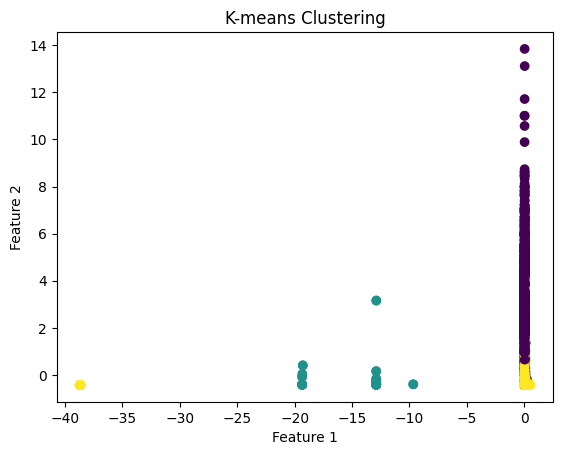

In [ ]:
plt.scatter(X_data[:, 0], X_data[:, 12], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

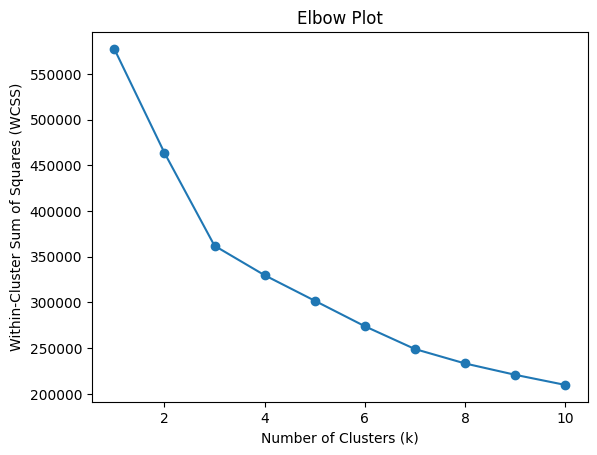

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of number of clusters to try
k_values = range(1, 11)

# Initialize an empty list to store the WCSS values
wcss_values = []

# Calculate the WCSS for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_data)
    wcss_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Plot')
plt.show()


In [ ]:
# we see the bend at k=3. Hence there will be 3 clusters means 3 main classes.

K-means is an unsupervised clustering algorithm and does not directly support classification with labeled output. It is primarily used for clustering and finding patterns in unlabeled data. However, if you have labeled data and want to perform classification, K-means is not the appropriate choice.

Then why are we using it?

In [ ]:
# now finding accuracy of KMEANS:

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_kmeans = accuracy_score(y_data, labels)

In [ ]:
accuracy_kmeans

0.313549459684123

In [ ]:
# KNN model:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X_data, y_data, test_size=0.2, random_state=2)

In [ ]:
len(x_test)

4812

In [ ]:
len(x_train)

19248

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model= KNeighborsClassifier( n_neighbors=40)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [ ]:
model.score(x_test, y_test)

0.5891521197007481

In [ ]:
model_param={
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,5,10,20, 30, 40, 100, 500]
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV

clf= GridSearchCV( KNeighborsClassifier(), {
    'n_neighbors': [3,5,10,20, 30, 40, 100, 500]
}, cv=5, return_train_score=False)

In [ ]:
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 20, 30, 40, 100, 500]})

In [ ]:
d= pd.DataFrame(clf.cv_results_)
d

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005109,0.002433,0.642766,0.105277,3,{'n_neighbors': 3},0.531169,0.529351,0.537922,0.526111,0.531567,0.531224,0.003864,8
1,0.003110,0.000153,0.396688,0.042253,5,{'n_neighbors': 5},0.541818,0.551688,0.561558,0.547415,0.551572,0.550810,0.006469,7
2,0.003135,0.000214,0.384728,0.015155,10,{'n_neighbors': 10},0.573766,0.567013,0.585714,0.581190,0.570018,0.575540,0.006954,5
3,0.003223,0.000284,0.406269,0.029018,20,{'n_neighbors': 20},0.585455,0.580779,0.587273,0.594180,0.579111,0.585360,0.005320,3
4,0.003049,0.000006,0.406322,0.007138,30,{'n_neighbors': 30},0.582857,0.579740,0.590909,0.597558,0.577553,0.585723,0.007453,2
5,0.003290,0.000292,0.468085,0.091578,40,{'n_neighbors': 40},0.589351,0.582597,0.597143,0.591322,0.574175,0.586918,0.007886,1
6,0.005328,0.000699,0.860492,0.058457,100,{'n_neighbors': 100},0.588831,0.587013,0.587532,0.577033,0.576254,0.583333,0.005499,4
7,0.003397,0.000464,0.964573,0.012370,500,{'n_neighbors': 500},0.556364,0.558442,0.555065,0.562484,0.558846,0.558240,0.002531,6


In [ ]:
d[['param_n_neighbors', 'mean_test_score']]

,param_n_neighbors,mean_test_score
0,3,0.531224
1,5,0.550810
2,10,0.575540
3,20,0.585360
4,30,0.585723
5,40,0.586918
6,100,0.583333
7,500,0.558240


Text(58.222222222222214, 0.5, 'Truth')

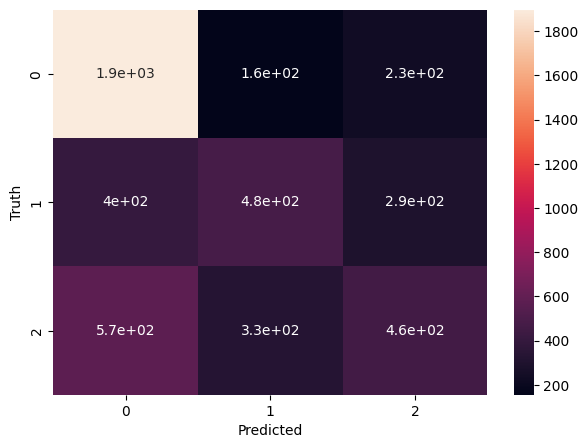

In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted= model.predict(x_test)

truth= y_test

cm= confusion_matrix(truth, y_predicted)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.66      0.83      0.74      2282
           1       0.50      0.41      0.45      1173
           2       0.47      0.34      0.39      1357

    accuracy                           0.59      4812
   macro avg       0.54      0.53      0.53      4812
weighted avg       0.57      0.59      0.57      4812



In [ ]:
# DNN:

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers, losses, activations, models
from tensorflow.keras.layers import Conv1D , MaxPooling1D , Dense ,Activation, Dropout ,GlobalMaxPooling1D , Input , Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(24,)))
model.add(layers.Dense(40,activation='relu'))
model.add(layers.Dense(30,activation='relu'))
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(5,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

opt = optimizers.Adam(0.0001)
model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 40)                1000      
                                                                 
 dense_66 (Dense)            (None, 30)                1230      
                                                                 
 dense_67 (Dense)            (None, 20)                620       
                                                                 
 dense_68 (Dense)            (None, 10)                210       
                                                                 
 dense_69 (Dense)            (None, 5)                 55        
                                                                 
 dense_70 (Dense)            (None, 3)                 18        
                                                                 
Total params: 3,133
Trainable params: 3,133
Non-train

In [ ]:
y_encoded= pd.get_dummies(y_data)

In [ ]:
y_encoded.head()

,0,1,2
0,0,0,1
1,0,0,1
2,1,0,0
3,0,1,0
4,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
X_train.shape

(19248, 24)

In [ ]:
y_test.shape

(4812, 3)

In [ ]:
model.fit(X_train, y_train,batch_size = 8,epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
2406/2406 [==============================] - 12s 3ms/step - loss: 1.0367 - accuracy: 0.4677 - val_loss: 0.9884 - val_accuracy: 0.4796
Epoch 2/100
2406/2406 [==============================] - 8s 3ms/step - loss: 0.9547 - accuracy: 0.5047 - val_loss: 0.9286 - val_accuracy: 0.5073
Epoch 3/100
2406/2406 [==============================] - 11s 5ms/step - loss: 0.9055 - accuracy: 0.5359 - val_loss: 0.8961 - val_accuracy: 0.5364
Epoch 4/100
2406/2406 [==============================] - 7s 3ms/step - loss: 0.8797 - accuracy: 0.5624 - val_loss: 0.8779 - val_accuracy: 0.5571
Epoch 5/100
2406/2406 [==============================] - 7s 3ms/step - loss: 0.8620 - accuracy: 0.5724 - val_loss: 0.8620 - val_accuracy: 0.5642
Epoch 6/100
2406/2406 [==============================] - 7s 3ms/step - loss: 0.8484 - accuracy: 0.5769 - val_loss: 0.8526 - val_accuracy: 0.5661
Epoch 7/100
2406/2406 [==============================] - 8s 3ms/step - loss: 0.8376 - accuracy: 0.5818 - val_loss: 0.8416 - val_

In [ ]:
model.evaluate(X_test, y_test)

151/151 [==============================] - 1s 5ms/step - loss: 0.7479 - accuracy: 0.5873


[0.747873067855835, 0.5872818231582642]

In [ ]:

# CNN:

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
num_classes=3

In [ ]:
model_1D= Sequential()
model_1D.add(Conv1D(6, kernel_size=3, activation='relu', input_shape=(24, 1)))
model_1D.add(MaxPooling1D(pool_size=2))
model_1D.add(Conv1D(4, kernel_size=3, activation='relu'))
model_1D.add(MaxPooling1D(pool_size=2))
model_1D.add(Flatten())
model_1D.add(Dense(20, activation='relu'))
model_1D.add(Dense(10, activation='relu'))
model_1D.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_1D.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_1D.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22, 6)             24        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 6)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 4)              76        
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 4)             0         
 1D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 16)                0         
                                                                 
 dense_71 (Dense)            (None, 20)              

In [ ]:
model_1D.fit(X_train, y_train, batch_size=8, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
2406/2406 [==============================] - 8s 3ms/step - loss: 0.9928 - accuracy: 0.5033 - val_loss: 0.9592 - val_accuracy: 0.5436
Epoch 2/50
2406/2406 [==============================] - 8s 3ms/step - loss: 0.9363 - accuracy: 0.5483 - val_loss: 0.9244 - val_accuracy: 0.5493
Epoch 3/50
2406/2406 [==============================] - 7s 3ms/step - loss: 0.9065 - accuracy: 0.5615 - val_loss: 0.8974 - val_accuracy: 0.5569
Epoch 4/50
2406/2406 [==============================] - 7s 3ms/step - loss: 0.8869 - accuracy: 0.5654 - val_loss: 0.8805 - val_accuracy: 0.5667
Epoch 5/50
2406/2406 [==============================] - 7s 3ms/step - loss: 0.8703 - accuracy: 0.5657 - val_loss: 0.8639 - val_accuracy: 0.5609
Epoch 6/50
2406/2406 [==============================] - 8s 3ms/step - loss: 0.8547 - accuracy: 0.5676 - val_loss: 0.8493 - val_accuracy: 0.5644
Epoch 7/50
2406/2406 [==============================] - 7s 3ms/step - loss: 0.8380 - accuracy: 0.5679 - val_loss: 0.8274 - val_accuracy:

In [ ]:
model_1D.evaluate(X_test, y_test)

151/151 [==============================] - 0s 2ms/step - loss: 0.7955 - accuracy: 0.5650


[0.7955031394958496, 0.5650457143783569]